In [1]:
import cv2
import numpy as np
import os
import pandas as pd
from random import shuffle
from tqdm import tqdm
from tensorflow.python.framework import ops
import csv
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

from tensorboard.backend.event_processing import event_accumulator
# from tflearn.layers.conv import  conv_2d, max_pool_2d
# from tflearn.layers.core import input_data, dropout, fully_connected
# from tflearn.layers.estimator import regression
from pickle import dump
from pickle import load
from sklearn.model_selection import train_test_split
# import tflearn
from keras import applications
import keras as ks
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
# from tflearn.utils import string
import pickle as pk
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers
from transformers import ViTForImageClassification
import torch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 82.4 MB/s eta 0:00:00


In [3]:
model = ViTForImageClassification.from_pretrained('/content/drive/MyDrive/saved_anveshan')

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.eval()
model.to(device)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_

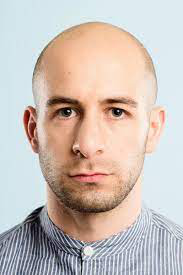

In [64]:
from PIL import Image
import requests

url = ''
im = Image.open('/content/drive/MyDrive/non_pain_set/img2.jpeg')
im

In [65]:
from transformers import ViTFeatureExtractor

feature_extractor = ViTFeatureExtractor.from_pretrained('/content/drive/MyDrive/saved_anveshan')
encoding = feature_extractor(images=im, return_tensors="pt")
encoding.keys()

dict_keys(['pixel_values'])

In [66]:
pixel_values = encoding['pixel_values'].to(device)

outputs = model(pixel_values)
logits = outputs.logits
logits.shape

torch.Size([1, 2])

In [69]:
prediction = logits.argmax(-1)
print("Predicted class: Pain" if model.config.id2label[prediction.item()]=='1' else "Predicted class: No Pain")

Predicted class: No Pain


In [68]:
type(model.config.id2label[prediction.item()])

str